<a href="https://colab.research.google.com/github/yashveeeer/RandomProjects/blob/main/1ClickMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
file_path = '/content/Test1.xlsx' 

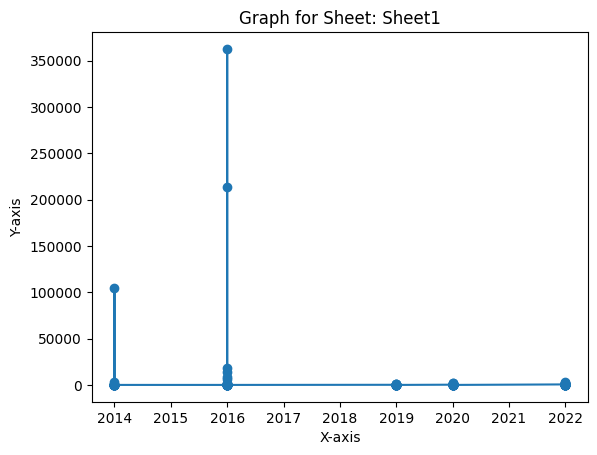

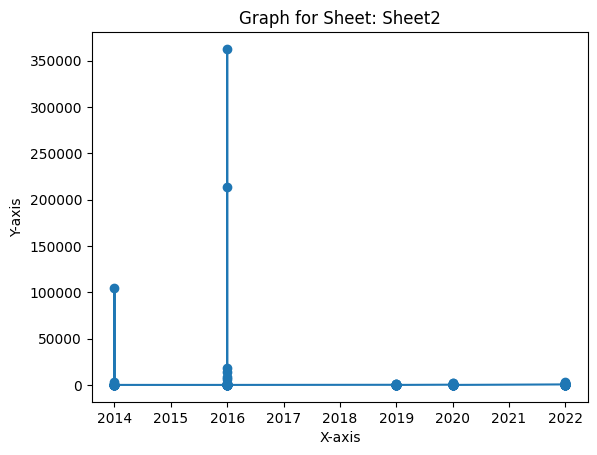

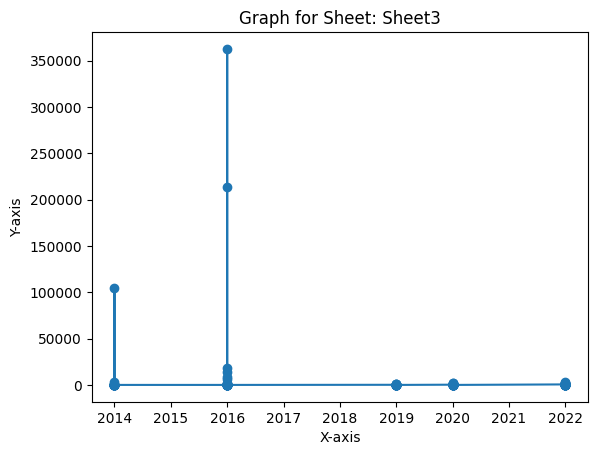

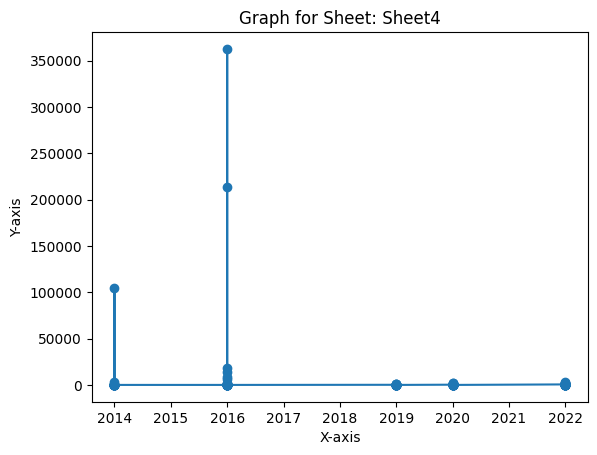

In [24]:
xls = pd.ExcelFile(file_path)

for sheet_name in xls.sheet_names:
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(file_path, sheet_name=sheet_name)  # Read the Excel sheet

    # Process the data and generate a graph
    plt.plot(df['Year'], df['Productivity'], marker='o', linestyle='-')  # Replace 'x' and 'y' with your column names

    # Customize the graph as needed
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Graph for Sheet: {}'.format(sheet_name))
    plt.show()

In [25]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.0 MB/s eta 0:00:00


In [35]:
import pandas as pd
import xlsxwriter
import os

file_path = '/content/Test1.xlsx'  # Replace with the actual file path in your Google Colab environment

xls = pd.ExcelFile(file_path)

for sheet_name in xls.sheet_names:
    xls = pd.ExcelFile(file_path)  # Reopen the Excel file for each sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)  # Read the Excel sheet

    # Extract column names for X-axis and Y-axis
    x_column = 'Year'  # Replace with the desired column name for X-axis
    y_columns = ['Productivity']  # Replace with the desired column names for Y-axis

    # Create a new workbook and add a worksheet
    output_dir = '/content/graphs'
    os.makedirs(output_dir, exist_ok=True)
    output_file_path = os.path.join(output_dir, 'graph_{}_{}.xlsx'.format(os.path.basename(file_path), sheet_name))
    workbook = xlsxwriter.Workbook(output_file_path)
    worksheet = workbook.add_worksheet()

    # Write the data to the worksheet
    worksheet.write_row(0, 0, df.columns)  # Write column headers
    for i, col in enumerate(df.columns):
        worksheet.write_column(1, i, df[col].fillna('N/A').replace([pd.np.inf, -pd.np.inf], 'Infinity'))


    # Create a chart object
    chart = workbook.add_chart({'type': 'line'})

    # Configure the chart
    for col in y_columns:
        chart.add_series({
            'values': [sheet_name, 1, df.columns.get_loc(col), len(df), df.columns.get_loc(col)],
            'categories': [sheet_name, 1, df.columns.get_loc(x_column), len(df), df.columns.get_loc(x_column)],
            'name': col
        })

    # Insert the chart into the worksheet
    worksheet.insert_chart('E1', chart)

    # Close the workbook
    workbook.close()


<ipython-input-35-cb4fb32b3ffe>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  worksheet.write_column(1, i, df[col].fillna('N/A').replace([pd.np.inf, -pd.np.inf], 'Infinity'))
